In [21]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

## Métodos de Monte Carlo

Cuando tenemos preguntas sobre procesos, y tenemos modelos de mecanismo de un proceso, podemos usar [métodos de Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method) para responderlas. Esto es extremadamente potente si ya sabes programar: hay muchas preguntas cuantitativas que son muy fáciles de formular y resolver como un experimento de Monte Carlo, pero muy difíciles de resolver de forma analítica.

### Ejemplo introductorio

Estamos jugando a cara o cruz con una moneda trucada. La moneda tiene la siguiente distribución de probabilidad:
```
cara: 0.6
cruz: 0.4
```

Si sale cruz ganas, si sale cara pierdes.

##### Pregunta 0

**¿Qué proporción de las veces ganas?**

Esta respuesta la podemos calcular trivialmente de forma analítica: `0.4`, que es simplemente la proporción de cruces esperada. Pero vamos a calcularla vía un experimento de Monte Carlo para romper mano. 

Llevamos a cabo "muchas" simulaciones de la tirada, y calculamos la proporción de cruces:

In [22]:
def estimate_win_proportion(num_trials: int) -> float:
    """
    cara: 0
    cruz: 1
    
    This simulates num_trials coin tosses and calculates num_cruces / total_tosses
    """
    trials = []
    
    for i in range(num_trials):
        if np.random.random() <= 0.4:
            trials.append(1)
        else:
            trials.append(0)
            
    return sum(trials) / len(trials)

for i in range(3):
    proportion_estimate = estimate_win_proportion(50000)
    print(proportion_estimate, "error: ", abs(0.4 - proportion_estimate))

0.40452 error:  0.0045199999999999685
0.39876 error:  0.0012400000000000189
0.3961 error:  0.0039000000000000146


Vemos que, efectivamente, la simulación de Monte Carlo nos da respuestas cercanas a la respuesta exacta, aunque en este caso sería más fácil calcular la proporción directamente.

##### Pregunta 1

Usamos la moneda en un juego con las siguientes reglas: la moneda se tira 2 veces, y dependiendo del número de cruces ganas (o pierdes) las siguientes cantidades:

| numero cruces | euros |
| ------------- | ----- |
| 0 | -2 |
| 1 | 0.5 |
| 2 | 1 |

**¿Cuál es [la media](https://en.wikipedia.org/wiki/Expected_value) de euros ganados (o perdidos) por partida si juegas a este juego con la moneda trucada?**

Esto también lo podemos calcular de forma analítica usando la [distribución binomial](https://en.wikipedia.org/wiki/Binomial_distribution), pero en este caso ya tenemos que saber más matemáticas:

$$
expected\_euros = -2 \cdot \binom{2}{0}0.6^{2} + 0.5 \cdot \binom{2}{1} 0.4 \cdot 0.6 + \binom{2}{2} 0.4 ^ 2
$$

In [23]:
exact_expected_euros = -2 * 1 * (0.6 ** 2) + 0.5 * 2 * (0.4 * 0.6) + 1 * 1 * (0.4 ** 2)
print(exact_expected_euros)

-0.31999999999999995


Si sabemos programar pero no usamos mucho las matemáticas en el día a día, igual es más fácil simularlo directamente que hacer el cálculo analítico:

In [24]:
def one_game() -> int:
    """
    This simulates a single game: a coin is tossed twice, the number of cruces is returned.
    """
    cruz_count = 0
    
    for i in range(2):
        if np.random.random() <= 0.4:
            cruz_count += 1
    return cruz_count

def average_euros(num_trials: int) -> float:
    """
    This simulates num_trials games and calculates total_euros / num_trials
    """
    
    euros = []
    for i in range(num_trials):
        cruz_count = one_game()
        if cruz_count == 0:
            euros.append(-2)
        elif cruz_count == 1:
            euros.append(0.5)
        else:
            euros.append(1)
            
    return sum(euros) / len(euros)
    
    
for i in range(3):
    estimated_expected_euros = average_euros(50000)
    print(estimated_expected_euros, "error: ", abs(estimated_expected_euros - exact_expected_euros))
    

-0.30185 error:  0.018149999999999944
-0.3164 error:  0.0035999999999999366
-0.32208 error:  0.0020800000000000263


### Preguntas de calentamiento

Consideramos un juego con 2 dados de 6 caras: el dado `a` es justo, el dado `b` tiene un sesgo que hace que aparezca más veces el 6 que los otros números, la tabla siguiente da las probabilidades:

| dado | 1 | 2 | 3 | 4 | 5 | 6 |
| ---- | - | - | - | - | - | - |
| a | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |
| b | 1/12 | 1/12 | 1/12 | 1/12 | 1/12 | 7/12 |

Consideramos la suma resultante de tirar `a` y `b` y sumarlos.

#### Pregunta 1

Jugamos a un juego en el que el jugador gana si saca más de un 8 y pierde si saca menos.

**¿Qué proporción de las veces esperas ganar si juegas a este juego con los dados a y b?**

In [25]:
def dice_a() -> int:
    random_number = np.random.random()
    
    if random_number <= 1/6:
        return 1
    
    if random_number <= 2/6:
        return 2
    
    if random_number <= 3/6:
        return 3
    
    if random_number <= 4/6:
        return 4
    
    if random_number <= 5/6:
        return 5
    
    return 6

def dice_b() -> int:
    random_number = np.random.random()
    
    if random_number <= 1/12:
        return 1
    
    if random_number <= 2/12:
        return 2
    
    if random_number <= 3/12:
        return 3
    
    if random_number <= 4/12:
        return 4
    
    if random_number <= 5/12:
        return 5
    
    return 6

def hope_to_win(num_trials: int) -> float:
    
    wins = []
    for i in range(num_trials):
        result = dice_a() + dice_b()
        if result > 8:
            wins.append(1)
        else:
            wins.append(0)
            
    return sum(wins) / len(wins)


for i in range(3):
    estimated_hope_to_win = hope_to_win(5000)
    print(estimated_hope_to_win)


0.4776
0.4832
0.4698


#### Pregunta 2

Pintar histogramas del resultado de las sumas de estos dados cuando se ejecutan simulaciones de Monte Carlo de 10, 100, y 10000 tiradas.

Pensar en lo que quiere decir esto:
* ¿Cuanto se parecen entre sí dos histogramas de 10 tiradas distintos?
* ¿Cuanto se parecen entre sí dos histogramas de 10000 tiradas distintos?
* Hemos caracterizado los dados `a` y `b` como tablas de valores y sus probabilidades. Pinta una tabla que haga lo mismo para los valores de la suma de a y b:

| 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
| - | - | - | - | - | - | - | - | -- | -- | -- |
| ? | ? | ? | ? | ? | ? | ? | ? | ? | ? | ? |

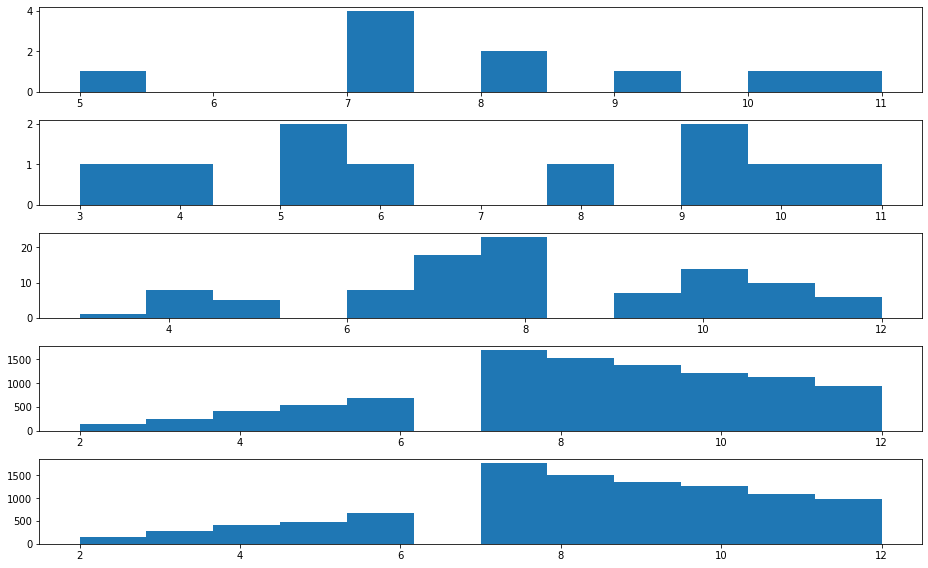

1 ->  0.0
2 ->  0.0146
3 ->  0.0264
4 ->  0.044
5 ->  0.0524
6 ->  0.0708
7 ->  0.175
8 ->  0.1582
9 ->  0.1412
10 ->  0.1244
11 ->  0.104
12 ->  0.089


In [42]:
def game(num_trials: int) -> float:
    results = []

    for i in range(num_trials):
        results.append(dice_a() + dice_b())
        
    return results

results = []
results.append(game(10))
results.append(game(10))
results.append(game(100))
results.append(game(10000))
results.append(game(10000))
#results.append(game(1000000))

figure, axes = plt.subplots(nrows=5, ncols=1, figsize=(13, 8))

for i, axe in enumerate(axes.flatten()):
    
    axe.hist(results[i], bins = 12)

figure.tight_layout()

_ = plt.show()


def get_num_elements(elements: list, value: int) -> int:
    num = []
    for element in elements:
        if element == value:
            num.append(1)
    
    return len(num)

sum_results = game(5000)

print ("1 -> ", get_num_elements(sum_results, 1)/5000)
print ("2 -> ", get_num_elements(sum_results, 2)/5000)
print ("3 -> ", get_num_elements(sum_results, 3)/5000)
print ("4 -> ", get_num_elements(sum_results, 4)/5000)
print ("5 -> ", get_num_elements(sum_results, 5)/5000)
print ("6 -> ", get_num_elements(sum_results, 6)/5000)
print ("7 -> ", get_num_elements(sum_results, 7)/5000)
print ("8 -> ", get_num_elements(sum_results, 8)/5000)
print ("9 -> ", get_num_elements(sum_results, 9)/5000)
print ("10 -> ", get_num_elements(sum_results, 10)/5000)
print ("11 -> ", get_num_elements(sum_results, 11)/5000)
print ("12 -> ", get_num_elements(sum_results, 12)/5000)